<a href="https://colab.research.google.com/github/vhiotirta22/Quiz_Machine-Learning/blob/main/Quiz_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz Machine Learning
Training dan Testing menggunakan SVM dan Random Forest <br>
Dataset yang saya gunakan adalah dataset masakan padang

---

Vhio Tirta Anggun Azizah - F55122066

In [1]:
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def load_image(file_path):
    image = Image.open(file_path)  # Memuat gambar menggunakan PIL
    image = image.resize((224, 224))  # Mengubah ukuran gambar jadi 224 karena biasanya begitu
    image = image.convert("RGB")  # Mengubah ke mode RGB jika diperlukan
    image_array = np.array(image)  # Mengubah gambar menjadi array numpy (tidak diperlukan sih)
    return image_array

In [4]:
# Verify if the drive is mounted by listing the content of your drive
!ls "/content/drive/MyDrive/Dataset/padang"

'ayam_goreng (100).jpg'    'gulai_tambusu (11).jpg'   'gulai_tunjang (115).jpg'
'ayam_goreng (101).jpg'    'gulai_tambusu (12).jpg'   'gulai_tunjang (116).jpg'
'ayam_goreng (102).jpg'    'gulai_tambusu (13).jpg'   'gulai_tunjang (117).jpg'
'ayam_goreng (103).jpg'    'gulai_tambusu (14).jpg'   'gulai_tunjang (118).jpg'
'ayam_goreng (104).jpg'    'gulai_tambusu (15).jpg'   'gulai_tunjang (11).jpg'
'ayam_goreng (105).jpg'    'gulai_tambusu (16).jpg'   'gulai_tunjang (122).jpg'
'ayam_goreng (106).jpg'    'gulai_tambusu (17).jpg'   'gulai_tunjang (123).jpg'
'ayam_goreng (107).jpg'    'gulai_tambusu (18).jpg'   'gulai_tunjang (124).jpg'
'ayam_goreng (10).jpg'	   'gulai_tambusu (19).jpg'   'gulai_tunjang (125).jpg'
'ayam_goreng (11).jpg'	   'gulai_tambusu (1).jpg'    'gulai_tunjang (126).jpg'
'ayam_goreng (12).jpg'	   'gulai_tambusu (20).jpg'   'gulai_tunjang (128).jpg'
'ayam_goreng (13).jpg'	   'gulai_tambusu (21).jpg'   'gulai_tunjang (129).jpg'
'ayam_goreng (14).jpg'	   'gulai_tambusu (22)

In [5]:
def load_dataset():
    X = []  # Array untuk menyimpan vektor
    y = []  # Array untuk menyimpan label kelas

    # Meload gambar Ayam Goreng
    for i in range(50):
        image = load_image("/content/drive/MyDrive/Dataset/padang/ayam_goreng ({}).jpg".format(i+1))
        vector = image.flatten()  # Mengubah gambar menjadi vektor
        X.append(vector)
        y.append(0)  # Label 0 untuk Ayam Goreng

    # Meload gambar Gulai Tunjang
    for i in range(50):
        image = load_image("/content/drive/MyDrive/Dataset/padang/gulai_tunjang ({}).jpg".format(i+1))
        vector = image.flatten()  # Mengubah gambar menjadi vektor
        X.append(vector)
        y.append(1)  # Label 1 untuk Gulai Tunjang

    # Meload gambar Gulai Tambusu
    for i in range(50):
        image = load_image("/content/drive/MyDrive/Dataset/padang/gulai_tambusu ({}).jpg".format(i+1))
        vector = image.flatten()  # Mengubah gambar menjadi vektor
        X.append(vector)
        y.append(2)  # Label 2 untuk Gulai Tambusu

    return np.array(X), np.array(y)

In [6]:
# Meload dataset
X, y = load_dataset()

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Melatih model SVM
svm_model = svm.SVC()
svm_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji menggunakan model SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Menghitung akurasi prediksi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Akurasi SVM: {:.2f}%".format(accuracy_svm * 100))

Akurasi SVM: 73.33%


In [8]:
# Melatih model Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji menggunakan model Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Menghitung akurasi prediksi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Akurasi Random Forest: {:.2f}%".format(accuracy_rf * 100))

Akurasi Random Forest: 73.33%


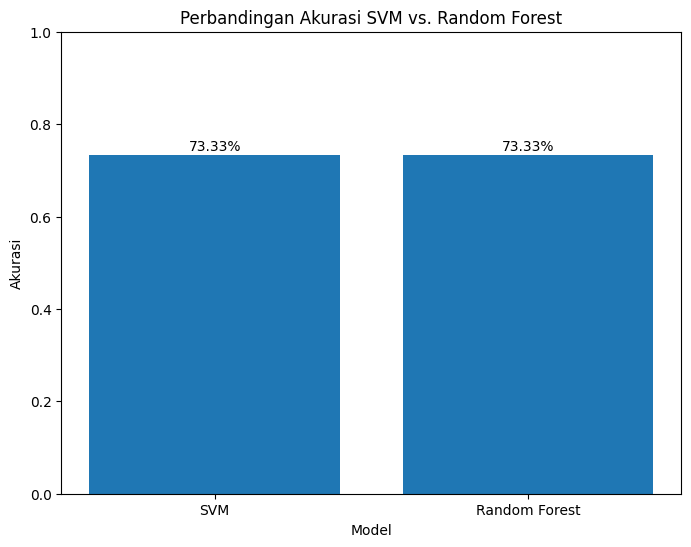

In [9]:
models = ['SVM', 'Random Forest']
accuracies = [accuracy_svm, accuracy_rf]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.title('Perbandingan Akurasi SVM vs. Random Forest')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim([0, 1])

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy*100:.2f}%', ha='center')

plt.show()

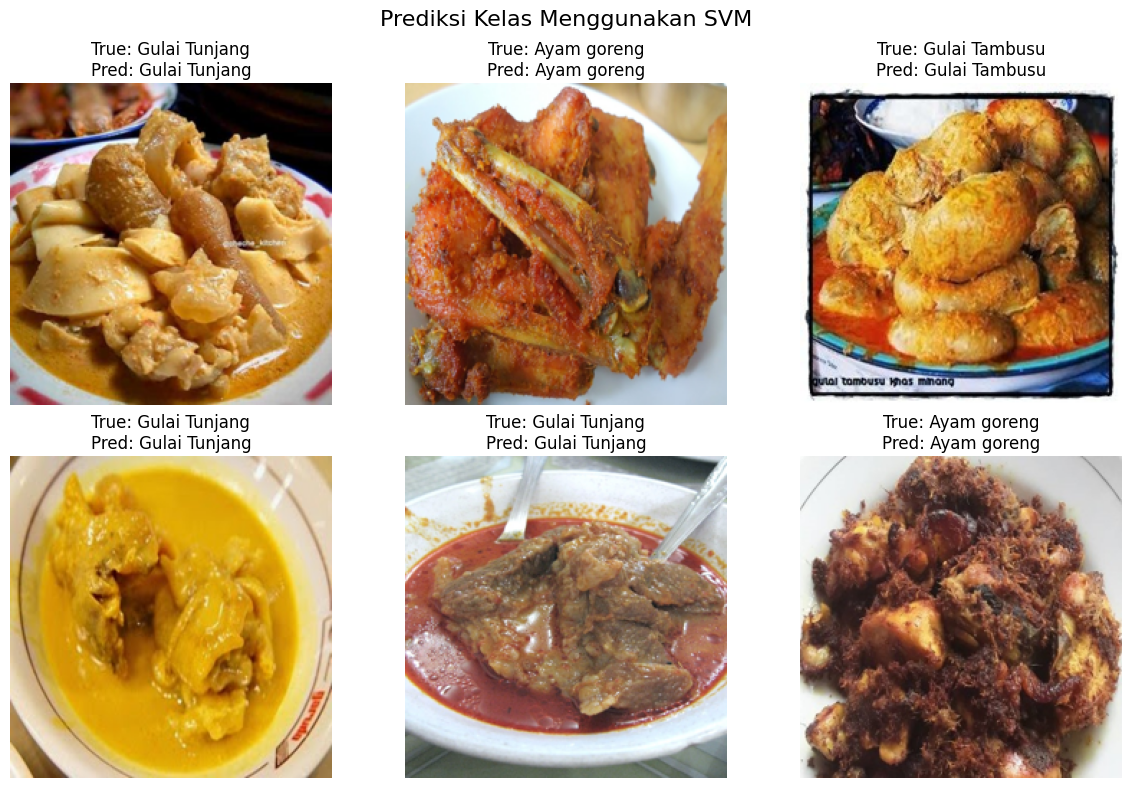

In [10]:
# Membuat mapping label kelas
class_mapping = {0: 'Ayam goreng', 1: 'Gulai Tunjang', 2: 'Gulai Tambusu'}

# Menampilkan gambar dengan prediksi kelas menggunakan model SVM
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Prediksi Kelas Menggunakan SVM', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(224, 224, 3).astype(np.uint8))
    true_label = class_mapping[y_test[i]]
    pred_label = class_mapping[y_pred_svm[i]]
    ax.set_title(f'True: {true_label}\nPred: {pred_label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

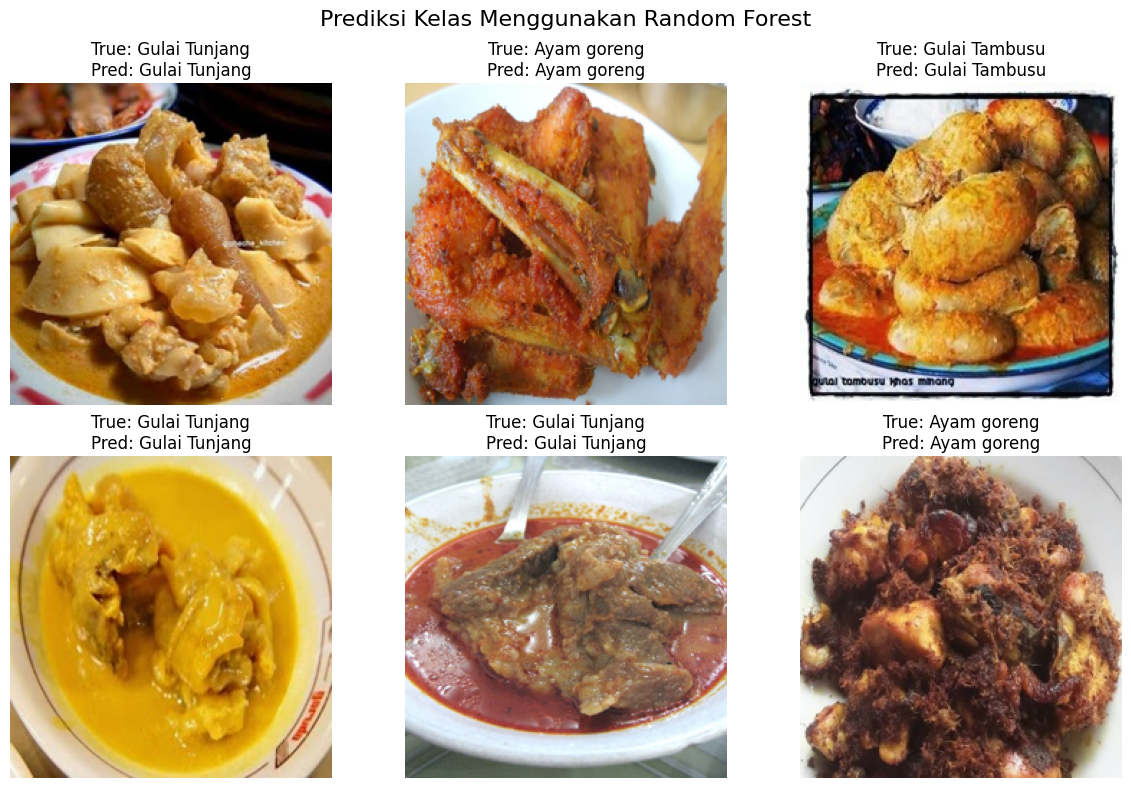

In [11]:
# Menampilkan gambar dengan prediksi kelas menggunakan model Random Forest
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Prediksi Kelas Menggunakan Random Forest', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(224, 224, 3).astype(np.uint8))
    true_label = class_mapping[y_test[i]]
    pred_label = class_mapping[y_pred_rf[i]]
    ax.set_title(f'True: {true_label}\nPred: {pred_label}')
    ax.axis('off')

plt.tight_layout()
plt.show()